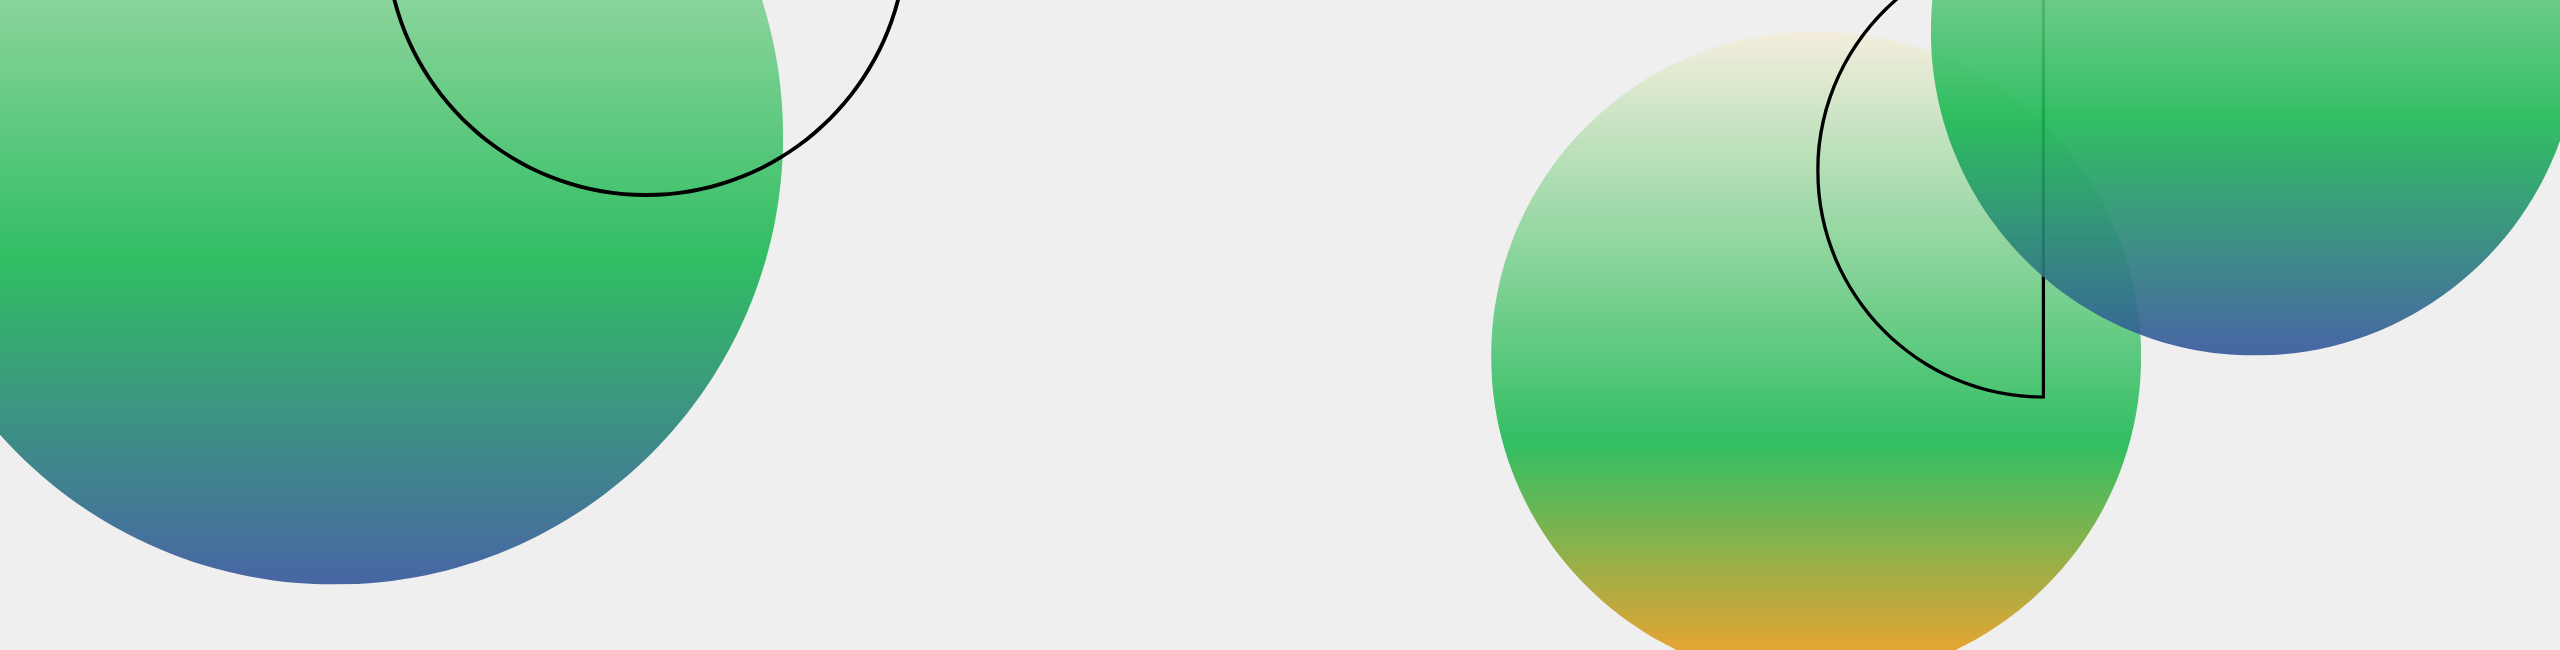

In [1]:
from IPython.display import Image
Image(filename='banner.png')

# ML Workshop: Analysing K-Pop with Python & Spotify 
## Part 1: Spotify API, Spotipy, EDA 
### Step 1: Spotify API
- create Spotify developer account / log in https://developer.spotify.com/dashboard/
- go to Dashboard: https://developer.spotify.com/dashboard/applications 
- create an app, get client ID and client secret

### Step 2: Import libraries, install Spotipy

In [2]:
%pip install spotipy --upgrade
# --upgrade is optional
# can also use terminal or command line to install, just leave off % 



Note: you may need to restart the kernel to use updated packages.


In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials 

### Step 3: Add client secret, ID, credentials from your Spotify app

In [4]:
client_id = "d317ec2a66684ac09e75ddfe89d2d7d5"
client_secret = "8241f536f4d4454cb61c3ea6ac4d0972"
client_credentials_manager = SpotifyClientCredentials(client_id=client_id, client_secret=client_secret)
sp = spotipy.Spotify(client_credentials_manager=client_credentials_manager) 

### Step 4: Find a playlist you like and set up url and playlist ID variables 

In [5]:
url="https://open.spotify.com/playlist/67ssuah7CCmp6R0STEceFs" # title: 'popular K-pop songs' 
username="Your name"
playlist_id="1HmNOUNQKVnAr2Y0GbHS7b"

### Step 5: Get playlist data

In [6]:
sp.user_playlist_tracks(username, playlist_id)

{'href': 'https://api.spotify.com/v1/playlists/1HmNOUNQKVnAr2Y0GbHS7b/tracks?offset=0&limit=100&additional_types=track',
 'items': [{'added_at': '2018-12-04T23:14:00Z',
   'added_by': {'external_urls': {'spotify': 'https://open.spotify.com/user/hyxkk5rgxntt4qsdc52l8fyci'},
    'href': 'https://api.spotify.com/v1/users/hyxkk5rgxntt4qsdc52l8fyci',
    'id': 'hyxkk5rgxntt4qsdc52l8fyci',
    'type': 'user',
    'uri': 'spotify:user:hyxkk5rgxntt4qsdc52l8fyci'},
   'is_local': False,
   'primary_color': None,
   'track': {'album': {'album_type': 'single',
     'artists': [{'external_urls': {'spotify': 'https://open.spotify.com/artist/41MozSoPIsD1dJM0CLPjZF'},
       'href': 'https://api.spotify.com/v1/artists/41MozSoPIsD1dJM0CLPjZF',
       'id': '41MozSoPIsD1dJM0CLPjZF',
       'name': 'BLACKPINK',
       'type': 'artist',
       'uri': 'spotify:artist:41MozSoPIsD1dJM0CLPjZF'}],
     'available_markets': ['AD',
      'AE',
      'AG',
      'AL',
      'AM',
      'AO',
      'AR',
      'A

### Step 6.1: Create dataframe with audio features as columns (API only allows 99 tracks)

In [7]:
playlist_features_list = ["artist","album","track_name", "track_id","danceability","energy","key","loudness","mode", "speechiness","instrumentalness","liveness","valence","tempo", "duration_ms","time_signature"]

In [8]:
def analyze_playlist(creator, playlist_id): # creator refers to username
    
    # Create column names
    playlist_features_list = ["artist","album","track_name", "track_id","danceability","energy","key","loudness","mode", "speechiness","instrumentalness","liveness","valence","tempo", "duration_ms","time_signature"]
    # Create dataframe with playlist column names
    playlist_df = pd.DataFrame(columns = playlist_features_list)
    # Grab playlist 
    playlist = sp.user_playlist_tracks(creator, playlist_id)["items"]
    
    for track in playlist:
        # Empty dict
        playlist_features = {}
        # Get metadata to identify track
        playlist_features["artist"] = track["track"]["album"]["artists"][0]["name"]
        playlist_features["album"] = track["track"]["album"]["name"]
        playlist_features["track_name"] = track["track"]["name"]
        playlist_features["track_id"] = track["track"]["id"]
        
        # Audio features
        audio_features = sp.audio_features(playlist_features["track_id"])[0]
        for feature in playlist_features_list[4:]:
            playlist_features[feature] = audio_features[feature]
        
        # Combining Dataframes
        track_df = pd.DataFrame(playlist_features, index = [0])
        playlist_df = pd.concat([playlist_df, track_df], ignore_index = True)
        
    return playlist_df

In [9]:
data=analyze_playlist(username,playlist_id)

In [10]:
data

,artist,album,track_name,track_id,danceability,energy,key,loudness,mode,speechiness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,BLACKPINK,DDU-DU DDU-DU,DDU-DU DDU-DU,1PMXpTPJfh3ViK8PMZ9ZnY,0.703,0.831,11,-3.493,0,0.0616,0,0.2050,0.461,139.927,209355,4
1,EXO,DON’T MESS UP MY TEMPO – The 5th Album,Tempo,4EjUFjzi4ErWjklOA3Aslu,0.686,0.842,0,-4.423,1,0.1000,0,0.0683,0.519,115.944,224483,4
2,BTS,MAP OF THE SOUL : PERSONA,Boy With Luv (feat. Halsey),5KawlOMHjWeUjQtnuRs22c,0.645,0.862,11,-4.757,0,0.0965,0,0.1920,0.798,119.991,229773,4
3,Jason Derulo,Let's Shut Up & Dance,Let's Shut Up & Dance,05fVrhFBjfElZiDfHDRxhF,0.765,0.893,6,-2.891,0,0.2090,0.000271,0.0331,0.715,110.051,208261,4
4,TOMORROW X TOGETHER,The Dream Chapter: STAR,CROWN,32h6yQGn4oAhZ0HRsTMX26,0.622,0.800,5,-5.819,1,0.0425,0,0.0619,0.580,110.977,230707,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,(G)I-DLE,I made,Senorita,0q6boCcLaWYPIy2vOsksFg,0.782,0.808,0,-3.139,1,0.0362,0.000043,0.3310,0.420,120.021,197616,4
96,ITZY,IT'z ICY,ICY,7zFBtYAVURF3bUVqEQ6UUu,0.801,0.904,2,-2.819,1,0.0834,0.000031,0.1820,0.814,124.979,191142,4
97,ITZY,IT'z ICY,CHERRY,3Ef2Sr4U0oehtcozO23yUN,0.829,0.559,11,-5.757,0,0.0666,0.000002,0.0561,0.532,94.991,190372,4
98,ITZY,IT'z ICY,IT'z SUMMER,7p2qGo8x2bW9B0W789i1pt,0.815,0.868,7,-4.203,1,0.0433,0.000125,0.1270,0.648,126.021,197898,4


### Step 6.2: Get full playlist (regular API just allows 99 tracks)

In [11]:
def get_playlist_tracks(username,playlist_id):
    results = sp.user_playlist_tracks(username,playlist_id)
    tracks = results['items']
    while results['next']:
        results = sp.next(results)
        tracks.extend(results['items'])
    return tracks

In [12]:
tracks=get_playlist_tracks(username,playlist_id)

In [13]:
tracks

[{'added_at': '2018-12-04T23:14:00Z',
  'added_by': {'external_urls': {'spotify': 'https://open.spotify.com/user/hyxkk5rgxntt4qsdc52l8fyci'},
   'href': 'https://api.spotify.com/v1/users/hyxkk5rgxntt4qsdc52l8fyci',
   'id': 'hyxkk5rgxntt4qsdc52l8fyci',
   'type': 'user',
   'uri': 'spotify:user:hyxkk5rgxntt4qsdc52l8fyci'},
  'is_local': False,
  'primary_color': None,
  'track': {'album': {'album_type': 'single',
    'artists': [{'external_urls': {'spotify': 'https://open.spotify.com/artist/41MozSoPIsD1dJM0CLPjZF'},
      'href': 'https://api.spotify.com/v1/artists/41MozSoPIsD1dJM0CLPjZF',
      'id': '41MozSoPIsD1dJM0CLPjZF',
      'name': 'BLACKPINK',
      'type': 'artist',
      'uri': 'spotify:artist:41MozSoPIsD1dJM0CLPjZF'}],
    'available_markets': ['AD',
     'AE',
     'AG',
     'AL',
     'AM',
     'AO',
     'AR',
     'AT',
     'AU',
     'AZ',
     'BA',
     'BB',
     'BD',
     'BE',
     'BF',
     'BG',
     'BH',
     'BI',
     'BJ',
     'BN',
     'BO',
     '

In [14]:
def analyze_playlist(creator, playlist_id):
    
    # Empty dataframe
    playlist_features_list = ["artist","album","track_name", "track_id","danceability","energy","key","loudness","mode", "speechiness","instrumentalness","liveness","valence","tempo", "duration_ms","time_signature"]
    
    playlist_df = pd.DataFrame(columns = playlist_features_list)
    
    
    playlist = get_playlist_tracks(username,playlist_id)
    for track in playlist:
        # Empty dict
        playlist_features = {}
        # Get metadata
        playlist_features["artist"] = track["track"]["album"]["artists"][0]["name"]
        playlist_features["album"] = track["track"]["album"]["name"]
        playlist_features["track_name"] = track["track"]["name"]
        playlist_features["track_id"] = track["track"]["id"]
        
        # Audio features
        audio_features = sp.audio_features(playlist_features["track_id"])[0]
        for feature in playlist_features_list[4:]:
            playlist_features[feature] = audio_features[feature]
        
        # Combining Dataframes
        track_df = pd.DataFrame(playlist_features, index = [0])
        playlist_df = pd.concat([playlist_df, track_df], ignore_index = True)
        
    return playlist_df

In [15]:
final_data=analyze_playlist(username, playlist_id)

In [16]:
final_data

,artist,album,track_name,track_id,danceability,energy,key,loudness,mode,speechiness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,BLACKPINK,DDU-DU DDU-DU,DDU-DU DDU-DU,1PMXpTPJfh3ViK8PMZ9ZnY,0.703,0.831,11,-3.493,0,0.0616,0,0.2050,0.461,139.927,209355,4
1,EXO,DON’T MESS UP MY TEMPO – The 5th Album,Tempo,4EjUFjzi4ErWjklOA3Aslu,0.686,0.842,0,-4.423,1,0.1000,0,0.0683,0.519,115.944,224483,4
2,BTS,MAP OF THE SOUL : PERSONA,Boy With Luv (feat. Halsey),5KawlOMHjWeUjQtnuRs22c,0.645,0.862,11,-4.757,0,0.0965,0,0.1920,0.798,119.991,229773,4
3,Jason Derulo,Let's Shut Up & Dance,Let's Shut Up & Dance,05fVrhFBjfElZiDfHDRxhF,0.765,0.893,6,-2.891,0,0.2090,0.000271,0.0331,0.715,110.051,208261,4
4,TOMORROW X TOGETHER,The Dream Chapter: STAR,CROWN,32h6yQGn4oAhZ0HRsTMX26,0.622,0.800,5,-5.819,1,0.0425,0,0.0619,0.580,110.977,230707,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
302,Monsta X,Take.1 Are You There?,Oh My,7aee43cpxAZ9CZysyLpUJC,0.700,0.890,9,-4.182,1,0.1070,0,0.3120,0.534,114.960,223650,4
303,Monsta X,ALL ABOUT LUV,WHO DO U LOVE? (feat. French Montana) - will.i...,2TYUwmIG2yjuhcvBvlA0CE,0.787,0.751,10,-4.219,0,0.0383,0.000002,0.1180,0.692,101.989,208683,4
304,Monsta X,Phenomenon,BLACK SWAN,79xIhPkRcXeYtSAA50wjsM,0.667,0.926,1,-3.418,0,0.1300,0,0.1110,0.707,100.020,206507,4
305,Monsta X,Phenomenon,X-Phenomenon,5ooX8h3Wv0va2pF7IAhJUs,0.418,0.875,5,-3.405,0,0.1950,0,0.0650,0.642,127.986,177080,3


### Step 7: Explore data

More info on audio features: https://developer.spotify.com/documentation/web-api/reference/#/operations/get-audio-features 

*Audio features* 

- danceability: 
how suitable a track is for dancing (0.0-1.0)

- energy: 
measure of intensity and activity eg fast / loud / noisy (0.0-1.0)

- key: 
integers mapping to pitches eg 0 is C (-1.0-11.0) 

- loudness: 
loudness in decibels(-60.0-0.0)
 > 0 is your hearing threshold, 60 dB is a normal conversation, though sound probably depends on your speakers

- mode: 
major or minor modality of a track (1.0 or 0.0)

- speechiness: 
detects spoken words eg audio books (0.0-1.0)

- instrumentalness: 
whether or not has vocals (0.0-1.0)

- liveness: 
detects presence of audience; above 0.8 means probably live (0.0-1.0) 

- valence: 
describes positivity, ranges from depressed/angry to happy/cheerful (0.0-1.0)

- tempo: 
speed/pace (float)

- duration_ms: 
how long the song is in milliseconds

- time_signature: 
how many beats/bar (3.0-7.0)

*Visualisation with Boxplots*
- most audio features plotted as boxplots 
- box shows where 50% of the data are present, line shows median ie ordered values' middle point)
- box edges: 1st, 3rd quartiles
- dots/diamonds: outliers
- boxplot whiskers extend to include most data (extend to the point closest to 1.5 times the interquartile range)

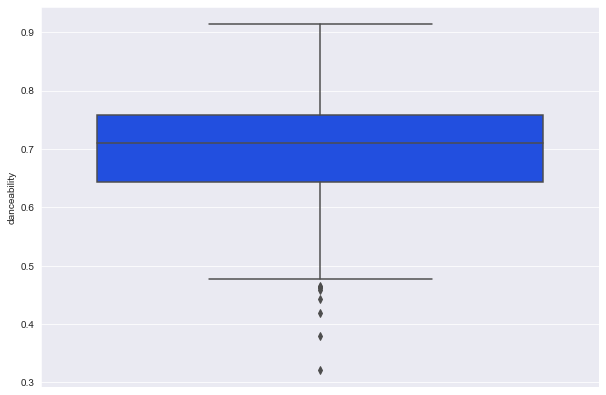

<Figure size 432x288 with 0 Axes>

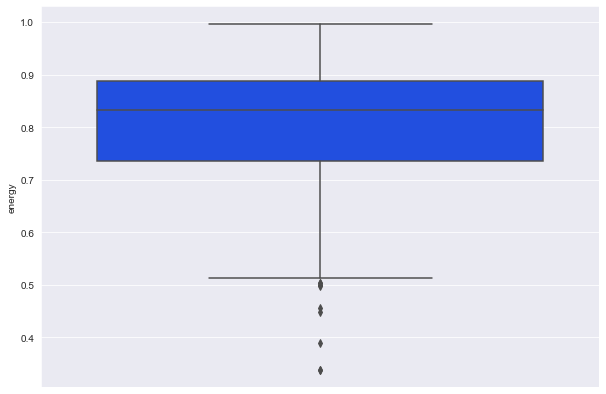

<Figure size 432x288 with 0 Axes>

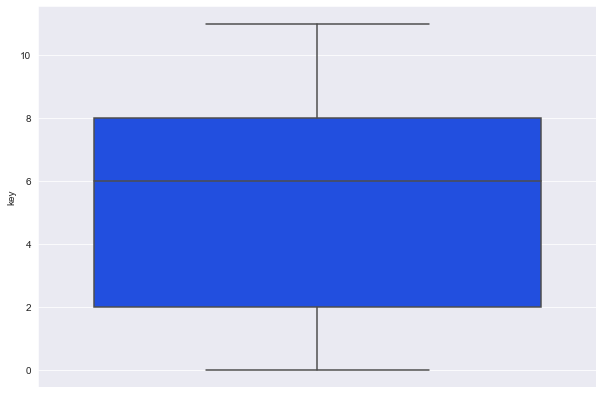

<Figure size 432x288 with 0 Axes>

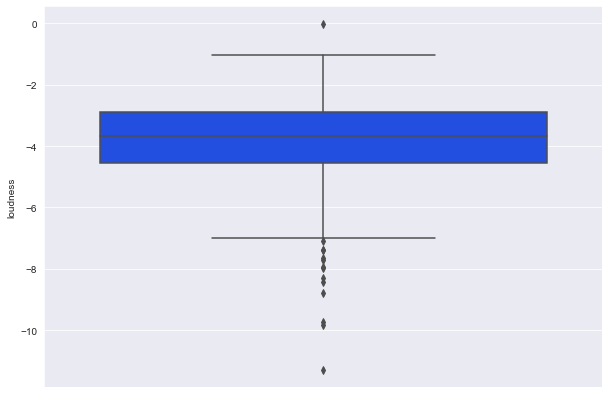

<Figure size 432x288 with 0 Axes>

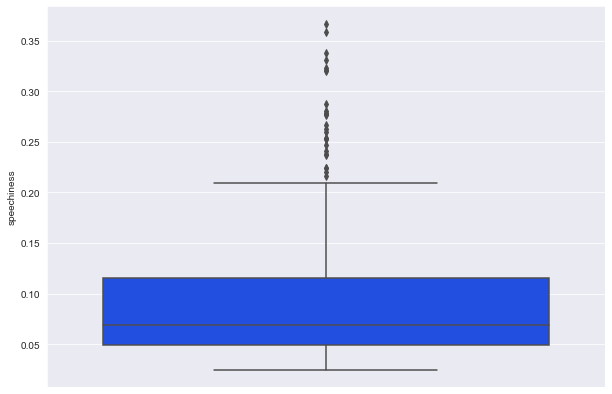

<Figure size 432x288 with 0 Axes>

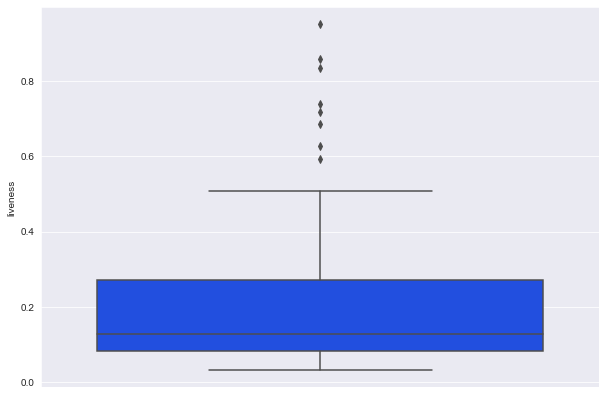

<Figure size 432x288 with 0 Axes>

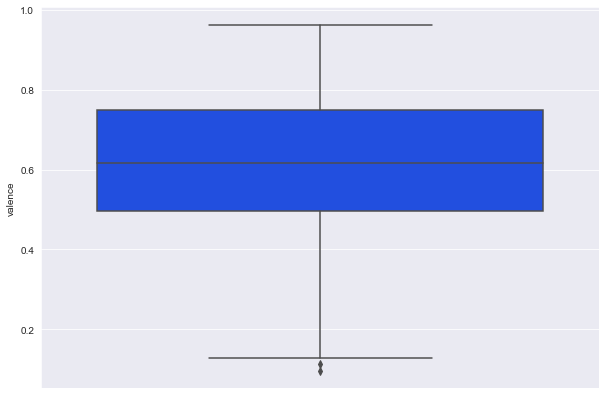

<Figure size 432x288 with 0 Axes>

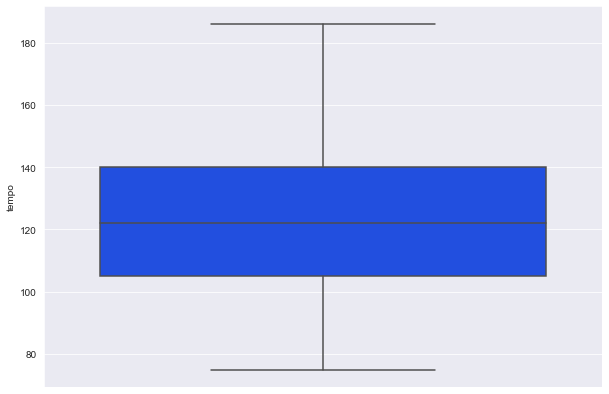

<Figure size 432x288 with 0 Axes>

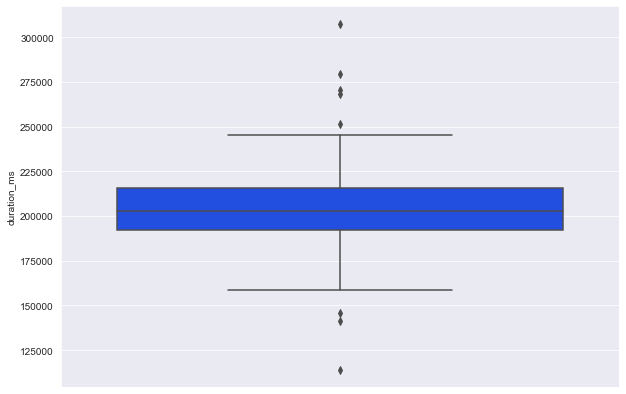

<Figure size 432x288 with 0 Axes>

In [21]:

selected_audio_features = ['danceability','energy','key','loudness','speechiness','liveness','valence','tempo','duration_ms']

def box_me(dataframe, my_audio_features): 
    for feature in my_audio_features: 
        plt.figure(figsize=(10, 7))
        sns.boxplot(y=dataframe[feature])
        sns.set_style('darkgrid') 
        sns.set_palette('bright') 
        plt.show() 
        plt.clf() 

box_me(final_data, selected_audio_features)

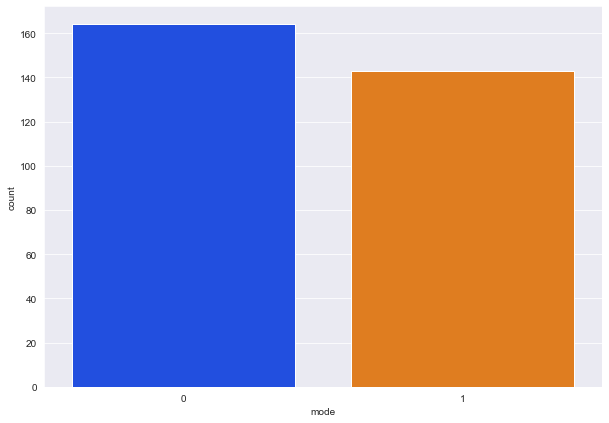

<Figure size 432x288 with 0 Axes>

In [18]:
plt.figure(figsize=(10,7))
sns.countplot(x=final_data['mode'])
sns.set_style('darkgrid') 
sns.set_palette('bright') 
plt.show()
plt.clf()

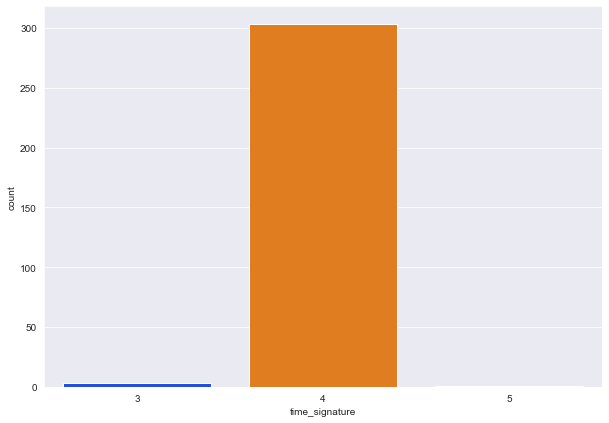

<Figure size 432x288 with 0 Axes>

In [19]:
plt.figure(figsize=(10,7))
sns.countplot(x=final_data['time_signature'])
sns.set_style('darkgrid') 
sns.set_palette('bright') 
plt.show()
plt.clf()

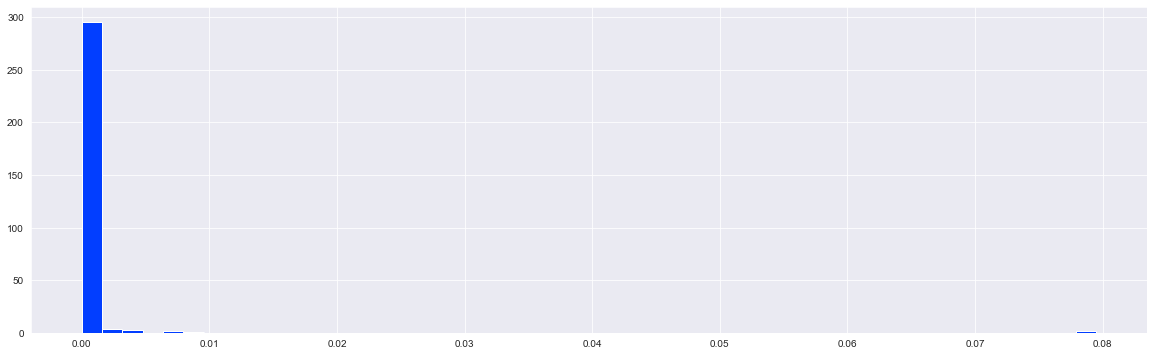

<Figure size 432x288 with 0 Axes>

In [20]:
plt.figure(figsize=(20, 6))
plt.hist(x=final_data['instrumentalness'], bins=50)
sns.set_style('darkgrid') 
sns.set_palette('bright') 
plt.show()
plt.clf()

### Step 8. Educated guesses: What makes a popular K-pop song? 

#### According to the data at hand, a popular K-pop song: 
- is rather danceable
- sounds cheerful, fast, loud, happy
- is in key D, E, F or G; can be equally popular in major or minor 
- ranges from 3-5 decibels in loudness  
- is not very speechy (lots of outliers - rap parts?) - more singing than talking
- is recorded in a studio (as opposed to a live recording)
- ca 105-140 BPM (higher than normal resting heart rate which is 60-100 BPM >> energising? stimulating?)
- is round about 200,000 ms long (roughly 3 minutes)
- overwhelmingly 4 beats/bar 
- most certainly has vocals 

## Thanks for attending and thank you for your time!